# Applications of accelerators

WS2020/2021

### Solutions to Exercise 05

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, e, epsilon_0
%matplotlib inline

1- [1 point] Repeat Ex.4-4. (see comment above) "Calculate the energy lost due to sychrotron radiation per turn of the particles in the previous example, assuming you are using the Diamond Light Source with the circumference of 561.6 [m]. What is the opening angle of the radiation cone in DEGREES?"

* 90 [AMeV] 238-U-28+
* 330 [MeV/u] 197-Au-77+
* 7 [TeV] protons
* 10 [GeV] electrons


In [2]:
def get_gamma(TMeV, m_0_Mev_c2):
    return TMeV/m_0_Mev_c2 + 1

In [3]:
def get_delta_e(gamma, q, rho):
    beta = np.sqrt(1-1/gamma**2)
    print(beta)
    return (q*e)**2 * beta**3 * gamma**4 / 3 / epsilon_0 / rho

In [4]:
def get_angle_degrees(gamma):
    return np.rad2deg(1/gamma)

90 [AMeV] 238-U-28+

In [5]:
gamma = get_gamma(238*90, 238*931.494)
print(gamma)

delta_e = get_delta_e(gamma, 28, 561.6/2/np.pi)
print(delta_e, '[J]')
print(delta_e/e, '[eV]')

print(get_angle_degrees(gamma), '[°]')

1.0966189798323982
0.4104263374433186
8.475168351939063e-28 [J]
5.2897840176210335e-09 [eV]
52.24766356117521 [°]


330 [MeV/u] 197-Au-77+

In [6]:
gamma = get_gamma(197*330, 197*931.494)
print(gamma)

delta_e = get_delta_e(gamma, 77, 561.6/2/np.pi)
print(delta_e, '[J]')
print(delta_e/e, '[eV]')

print(get_angle_degrees(gamma), '[°]')

1.3542695927187935
6.612645630263357e-26 [J]
4.1272888047520785e-07 [eV]
42.307513822308394 [°]


7 [TeV] protons

In [7]:
gamma = get_gamma(7000000, 938.272)
print(gamma)

delta_e = get_delta_e(gamma, 1, 561.6/2/np.pi)
print(delta_e, '[J]')
print(delta_e/e, '[eV]')

print(get_angle_degrees(gamma), '[°]')

7461.523174516557
3.351301660785082e-14 [J]
209171.79899377807 [eV]
0.007678831543238435 [°]


10 [GeV] electrons

In [8]:
gamma = get_gamma(10000, 0.510)
print(gamma)

delta_e = get_delta_e(gamma, 1, 561.6/2/np.pi)
print(delta_e, '[J]')
print(delta_e/e, '[eV]')

print(get_angle_degrees(gamma), '[°]')

19608.843137254902
1.598495626729761e-12 [J]
9977025.041918281 [eV]
0.0029219357364446397 [°]


2- [1 point] please calculate the magnetic rigidity using the method as shown in the video on ILIAS (do not use your Python code, do it by hand, this is an exercise similar to the exam!):

- electrons @ 20 [MeV]
- protons @ 100 [keV]
- 58-Ni-26+ @ 184 [AMeV]
- 238-U-90+ @ 190 [AMeV]

In [9]:
def get_brho(gamma, m_0_Mev_c2, q):
    beta = np.sqrt(1-1/gamma**2)
    return gamma * beta * c * m_0_Mev_c2 * 1.66e-27 / 931.494 / q / e

electrons @ 20 [MeV]

In [10]:
print(get_brho(get_gamma(20, 0.510), 0.510, 1), '[Tm]')

0.06837064746461918 [Tm]


protons @ 100 [keV]

In [11]:
print(get_brho(get_gamma(0.1, 938.272), 938.272, 1), '[Tm]')

0.04568033564254131 [Tm]


58-Ni-26+ @ 184 [AMeV]

In [12]:
print(get_brho(get_gamma(58*184, 58*931.494), 58*931.494, 26), '[Tm]')

4.565197223187408 [Tm]


238-U-90+ @ 190 [AMeV]

In [13]:
print(get_brho(get_gamma(238*190, 238*931.494), 238*931.494, 90), '[Tm]')

5.507351459680521 [Tm]


3- [1 point] You usually need quadrupoles in synchrotrons and transfer lines otherwise you can not transport charged particles. How do people transport neutrons in the European Spallation Source (ESS) inside the pipes until they reach experiments?

Since neutrons have no charge, they can not be guided by an electromagnetic system. Highly polished vacuum tubes, the so called **neutron guides** are used. Please see [this paper](https://doi.org/10.1016/j.nima.2012.11.183) and [this paper](https://doi.org/10.1016/j.nima.2012.08.027) for more information.

4- [1 point] Write in your own words, what is the advantage of sub-critical reactors and how does an accelerator help with that?

5- [1 point] Write in your own words, what is the emittance? What is beta function?

6- [1 point] Write in your own words, what is the Bragg peak in accelerator physics and where does it come from?


please see lecture slides

7- [1 point] Similar to task 1, but write a Python code that plots the radiated energy per turn of an electron with respect to its gamma for the Diamond Light Source. Make a nice plot, with axis labels and units, grid and title, save it as PNG and upload it together with your code on your GitHUB account.

Hint: use the generalised formula on slide 24!
Hint: you can vary gamma from minimum to a maximum which corresponds to the 3 [GeV] used in Diamond Light Source.

In [14]:
gamma_max = int(get_gamma(3000, 0.510))
gamma_max

5883

In [15]:
gammas = np.arange(1, gamma_max)

In [16]:
delta_e = get_delta_e(gammas, 1, 561.6/2/np.pi) / e / 1e3

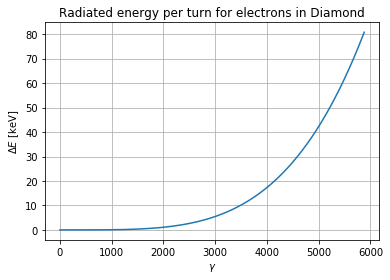

In [17]:
plt.plot(gammas, delta_e)
plt.grid()
plt.xlabel(r'$\gamma$')
plt.ylabel(r'$\Delta E$ [keV]')
plt.title('Radiated energy per turn for electrons in Diamond')
plt.savefig('diamond.png')